# Lead Score - Case Study

An education company named X Education sells online courses to industry professionals. On any given day, many professionals
who are interested in the courses land on their website and browse for courses. The company markets its courses on several
websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a
form for the course or watch some videos. When these people fill up a form providing their email address or phone number,
they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired,
employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted
while most do not. The typical lead conversion rate at X education is around 30%.

## Problem Statement

An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying
customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that
the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a
lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals and Objectives

There are quite a few goals for this case study.

*Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by
 the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert
 whereas a lower score would mean that the lead is cold and will mostly not get converted.

*There are some more problems presented by the company which your model should be able to adjust to if the company's
 requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file.
 Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final
 PPT where you'll make recommendations.



## The main steps are :

### 1.Read and understand the data
### 2.Clean the data
### 3.Prepare the data for Model Building
### 4.Model Building
### 5.Model Evaluation
### 6.Making Predictions on the Test Set

## 1.READ AND UNDERSTAND THE DATA

In [313]:
# importing modules and supress unnecessary warnings 
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [314]:
#Reading csv data
leads_data=pd.read_csv("Leads.csv")

In [315]:
#fetching sizeof data
leads_data.shape

(9240, 37)

In [316]:
#Checking data types and null values
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [317]:
#inspect the different columns in the data
leads_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [318]:
#checking the top rows of the data
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [319]:
# Check the summary of the dataset
leads_data.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,...,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,...,1,6,7,3,3,NaN,NaN,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,...,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,...,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,...,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,...,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


## 2.CLEAN THE DATA

In [329]:
#inspecting missing values in the data
Null_values=leads_data.isnull().sum()/leads_data.shape[0]*100

In [330]:
#Dropping the columns having null values more than 40%
null_40=(Null_values[Null_values>40]).index.to_list()
leads_data.drop(columns=null_40,inplace=True)

In [331]:
#column count reduces by 5, after dropping null values >40%
leads_data.shape

(9240, 32)

In [332]:
#inspecting info
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [333]:
#re-checking null values%
Null_values=leads_data.isnull().sum()/leads_data.shape[0]*100
Null_values=Null_values.sort_values(ascending=False)
Null_values

Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Receive More Updates About Our Courses            0.000000
Update me on Supply Chain Content                 0.000000
Prospect ID                                       0.000000
Digital Advertisement                             0.000000
Get updates on DM Content                         0.0000

In [334]:
#List of the columns having null values
Null_values=Null_values[Null_values>0]
Null_values=Null_values.index.to_list()
Null_values

['Tags',
 'Lead Profile',
 'What matters most to you in choosing a course',
 'What is your current occupation',
 'Country',
 'How did you hear about X Education',
 'Specialization',
 'City',
 'TotalVisits',
 'Page Views Per Visit',
 'Last Activity',
 'Lead Source']

There are 12 columns that have null values we need to impute median for numerical and mode for categorical

In [335]:
#Imputing mode in categorical columns and median in numerical columns at place of null values.
for col in Null_values:
    if leads_data[col].dtype=="object":
        leads_data[col]=leads_data[col].fillna(leads_data[col].mode()[0])
    else:
        leads_data[col]=leads_data[col].fillna(leads_data[col].median())

In [336]:
#Checking final null values in each column
leads_data.isna().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

Now the data is free from null values we are good to go

In [337]:
#now column and row count remains tha same
leads_data.shape

(9240, 32)

In [338]:
# Display all 200 columns of x_train
column_names = leads_data.columns.tolist()
print(column_names[:32])

['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [339]:
#Summary of Unique value count in each column
leads_data.nunique().sort_values(ascending=False)

Prospect ID                                      9240
Lead Number                                      9240
Total Time Spent on Website                      1731
Page Views Per Visit                              114
TotalVisits                                        41
Country                                            38
Tags                                               26
Lead Source                                        21
Specialization                                     19
Last Activity                                      17
Last Notable Activity                              16
How did you hear about X Education                 10
City                                                7
What is your current occupation                     6
Lead Profile                                        6
Lead Origin                                         5
What matters most to you in choosing a course       3
Converted                                           2
Do Not Call                 

columns have 1 unique value means it has only 1 value so no need to keep it,it doesn't gave any idea regarding leads

In [340]:
#columns have 1 unique value means it has only 1 value so no need to keep it
unique_count=leads_data.nunique()
single_unique=unique_count[unique_count==1]
single_unique=single_unique.index.to_list()
single_unique

['Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [341]:
#Dropping these columns having single value in column.
leads_data.drop(columns=single_unique,axis=1,inplace=True)
leads_data.shape

(9240, 27)

In [342]:
leads_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Profile', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [343]:
#Creating summary having type and unique count to look into rest of the fields
col_type_with_unique_value_counts=leads_data.nunique().sort_values(ascending=False)
col_type_with_unique_value_counts=col_type_with_unique_value_counts.reset_index()
col_type_with_unique_value_counts=col_type_with_unique_value_counts.rename(columns={"index":"Col_name",0:"unique_val_count"})
col_type_with_unique_value_counts["dtype"]=col_type_with_unique_value_counts["Col_name"].apply(lambda x: leads_data[x].dtype)
col_type_with_unique_value_counts

,Col_name,unique_val_count,dtype
0,Prospect ID,9240,object
1,Lead Number,9240,int64
2,Total Time Spent on Website,1731,int64
3,Page Views Per Visit,114,float64
4,TotalVisits,41,float64
5,Country,38,object
6,Tags,26,object
7,Lead Source,21,object
8,Specialization,19,object
9,Last Activity,17,object


Dropping columns having all unique values, as every value is different these columns won't give any insights so,we should remove these.

In [190]:
leads_data.drop(columns=["Prospect ID","Lead Number"],inplace=True)

Inspecting all the columns to find the select value mentioned in the problem statement ie, it is given when we don't know about the value so it is same as null values

In [191]:
for col in leads_data:
    print(leads_data[col].value_counts())
    print("---------------------------------------------------------------")

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
---------------------------------------------------------------
Lead Source
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
---------------------------------------------------------------
Do Not Email
No     8506
Yes     734
Name: count, dtype: int64
---------------------------

In [192]:
mode_value_spec = leads_data['Specialization'].mode()[0]
mode_value_lead = leads_data['Lead Profile'].mode()[0]
mode_value_how = leads_data['How did you hear about X Education'].mode()[0]
print(mode_value_spec,mode_value_lead,mode_value_how)

Select Select Select


We can see that 'select' value is present in [Specialization,Lead Profile,How did you hear about X Education,City] these columns and from the problem statement we know that these values are equivalent to null

Clearly we can see that [Specialization,Lead Profile,How did you hear about X Education] in these columns select is the mode value so it's value is high

From dictionary we can understand that these columns won't give much idea of lead so we can drop these columns

In [193]:
leads_data.drop(['City','Lead Profile','How did you hear about X Education','Specialization'] ,axis=1, inplace=True)

## EDA

In [194]:
#Creating list of Categorical and numerical columns, which will help us in EDA
cat_cols=leads_data.select_dtypes(include="object").columns.to_list()
num_cols=leads_data.select_dtypes(include=["float64","int64"]).columns.to_list()
#num_cols.remove("Converted")

In [195]:
#Summary of Leads converted and not converted
leads_data.Converted.value_counts()

Converted
0    5679
1    3561
Name: count, dtype: int64

In [196]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

In [197]:
cat_cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Tags',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

### Corelation between numerical features

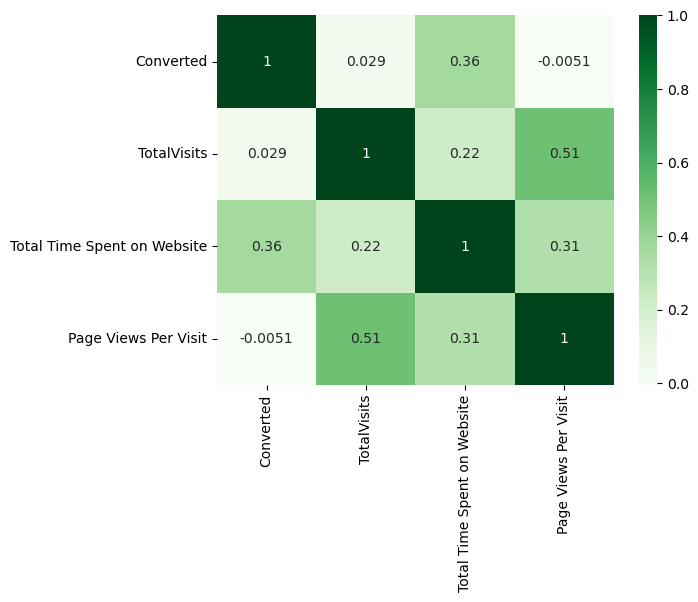

In [198]:
sns.heatmap(data=leads_data[num_cols].corr(),cmap='Greens',annot=True)
plt.show()

Observations:
    pages views per visit and total show some corelation we can inspect it more in bivariate now

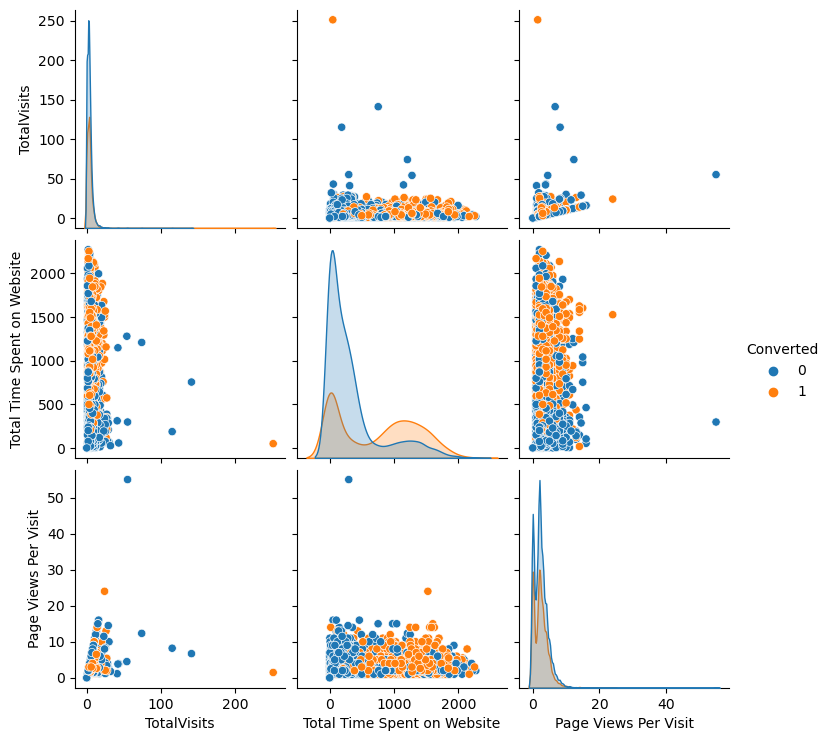

In [199]:
sns.pairplot(data=leads_data,diag_kind='kde',hue='Converted')
plt.show()

Inference drawn from Bivariate Analysis for Numerical Variables:

There is positive correlation between 'Total Visits' and 'Page Views per Visit', indicating that customers who visit the website more frequently tend to view more pages per visit.

Customers who spend more time on the website have a higher Leads, indicating that increasing the time spent on the website can lead to higher conversion rates.


### Checking Outliers In Numerical Features

In [200]:
#creating a function for checking for outliers through boxplot
def Check_Outliers(data,columnList):

    plt.figure(figsize=[22,11])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)

    for i,j in enumerate(columnList):
        plt.subplot(2,2,i+1)

        sns.boxplot(y=data[j])     # y = df_leads[j] to make plot verticle

        plt.suptitle("\nChecking Outliers using Boxplot",fontsize=20,color="green")
        plt.ylabel(None)
        plt.title(j,fontsize=15,color='brown')

In [201]:
#adding num_cols to check the outliers
num_cols = leads_data[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]

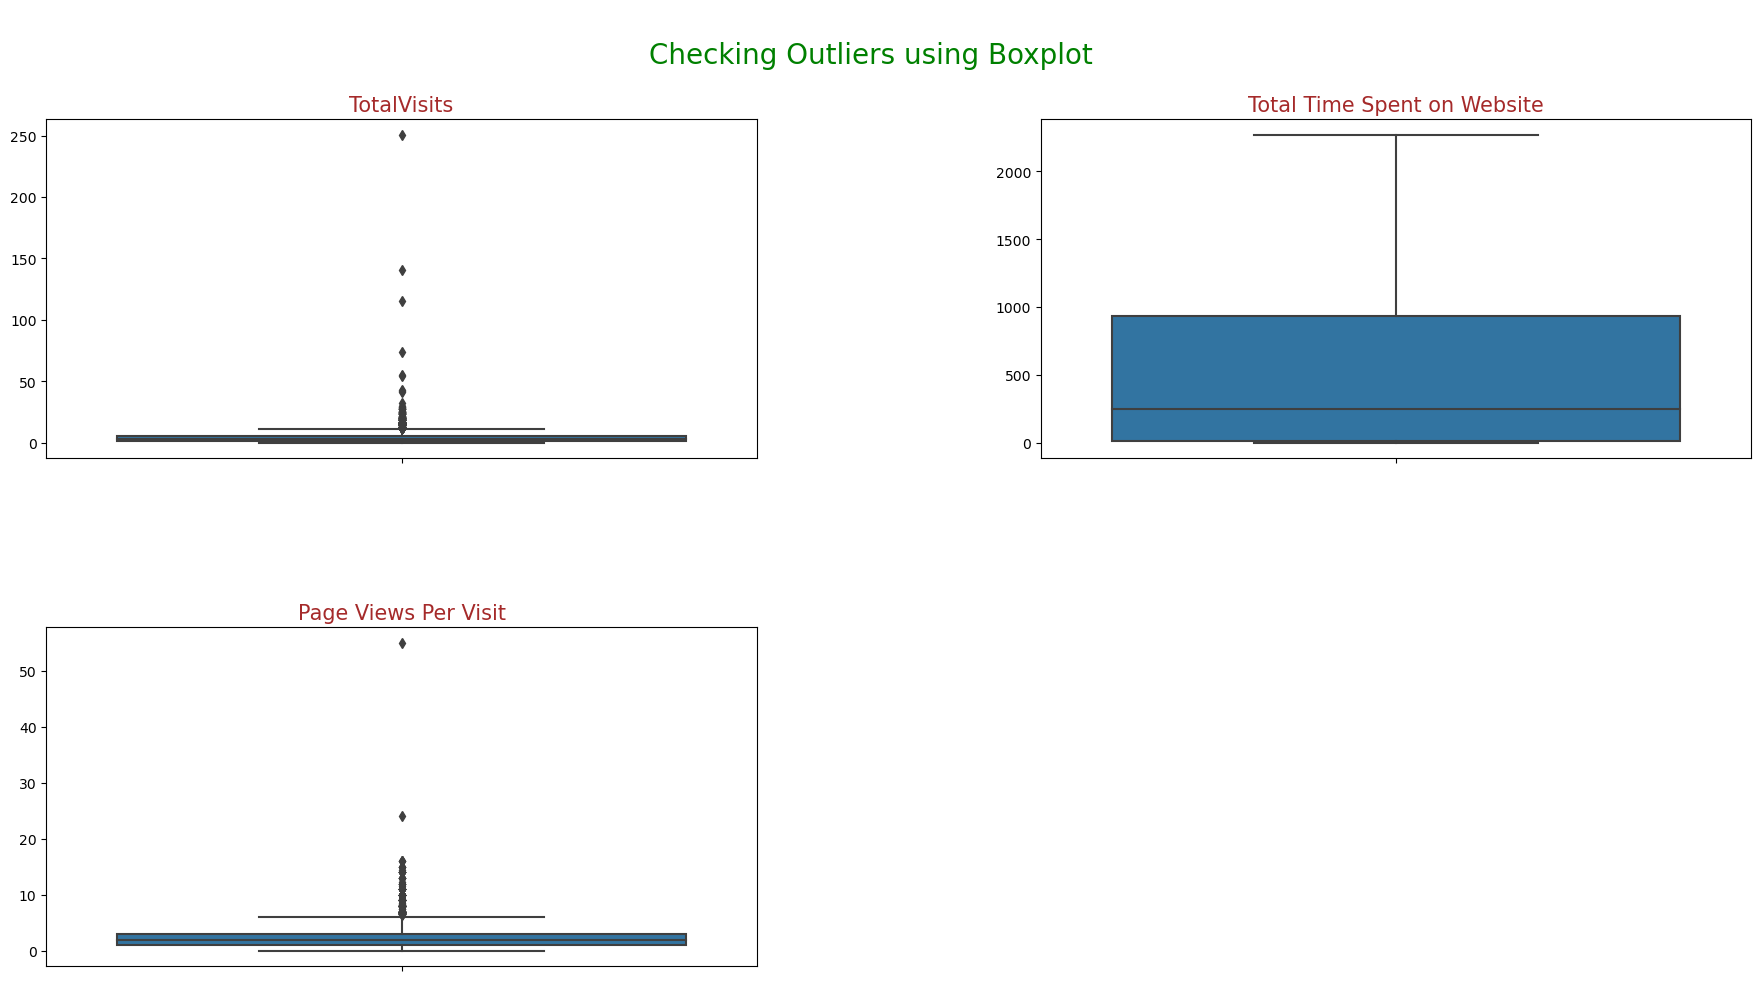

In [202]:
Check_Outliers(leads_data,num_cols)

Inference:
  
  "TotalVisits","Page Views Per Visit":Both these variables contain outliers as can be seen in the boxplot So, These outliers      needs to be treated for these variables

#### Capping Outliers for the treatment

In [203]:
# before outlier treatment
leads_data.describe(percentiles=[.10,.25,.50,.75,.95])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
max,1.000000,251.000000,2272.000000,55.000000


In [204]:
# Defining UDF to treat outliers via capping and flooring

def Outlier_treatment(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        # capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])

        # flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])


In [205]:
# Checking outliers for numerical variables other than target variable
capping_cols = ["TotalVisits","Page Views Per Visit"]

# UDF
Outlier_treatment(leads_data,capping_cols)

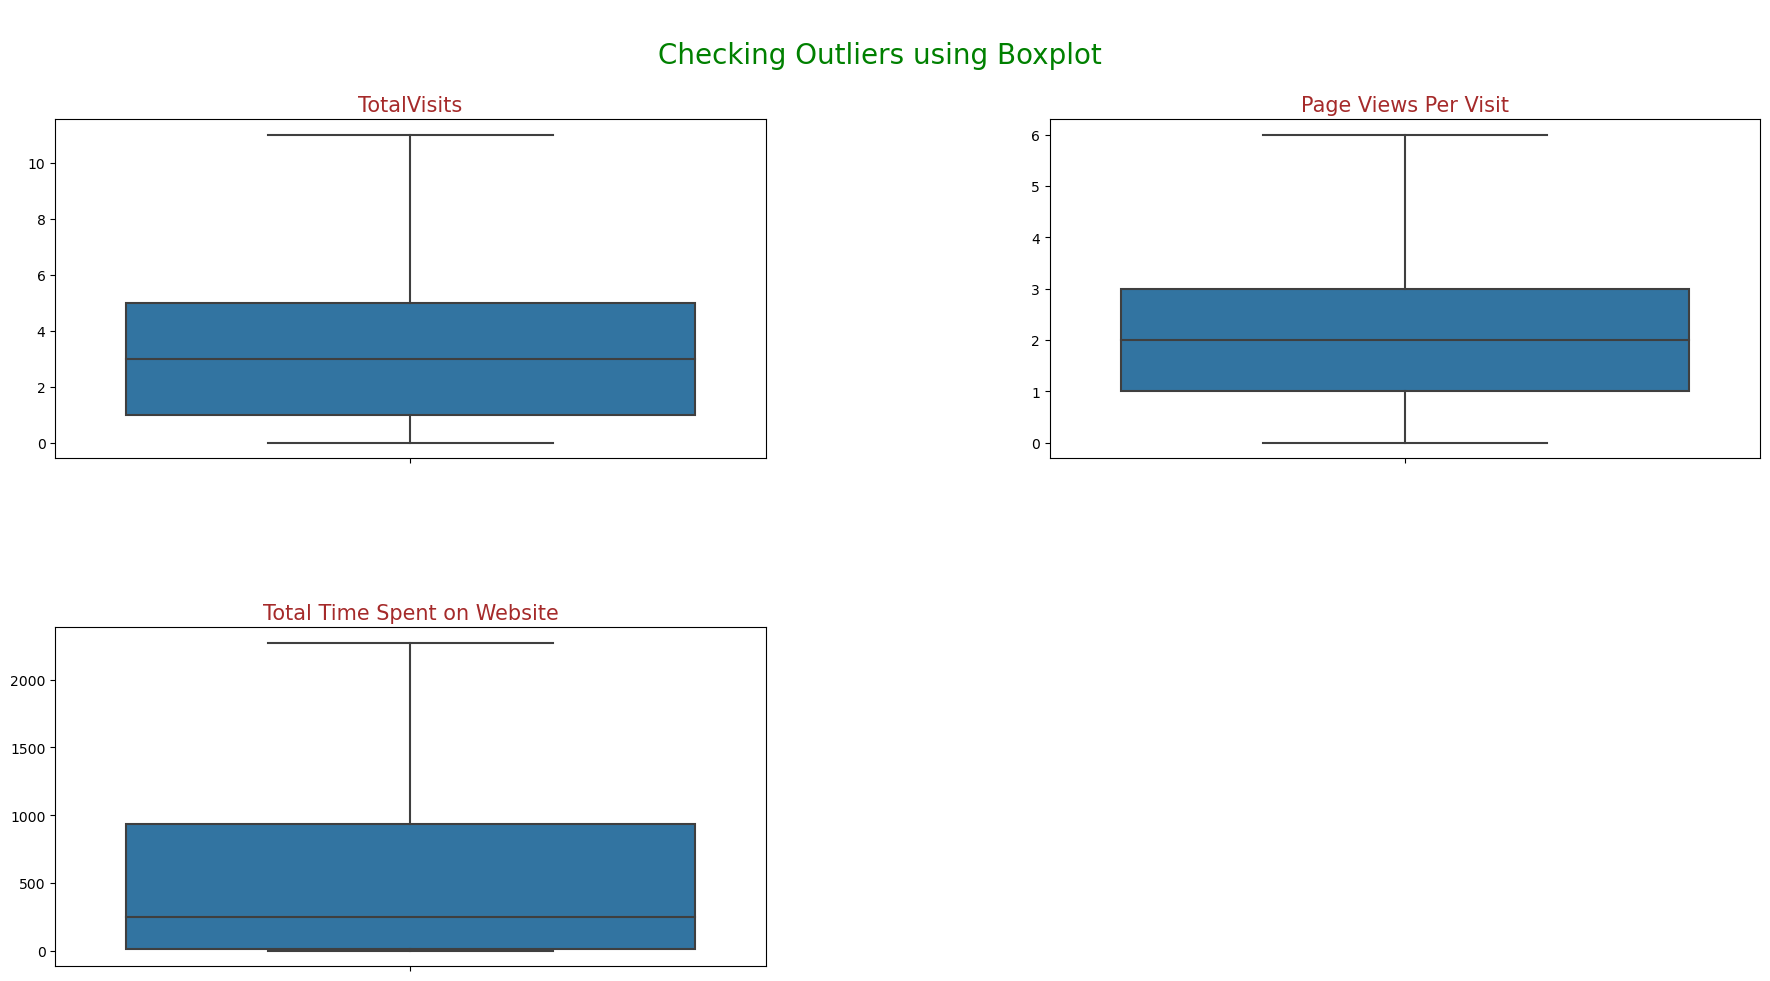

In [206]:
# Checking Boxplot after Outlier Treatment

num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF for boxplot
Check_Outliers(leads_data,num_cols)

Outliers is treated we are good to go

### Comparison of leads converted for each categorical feature

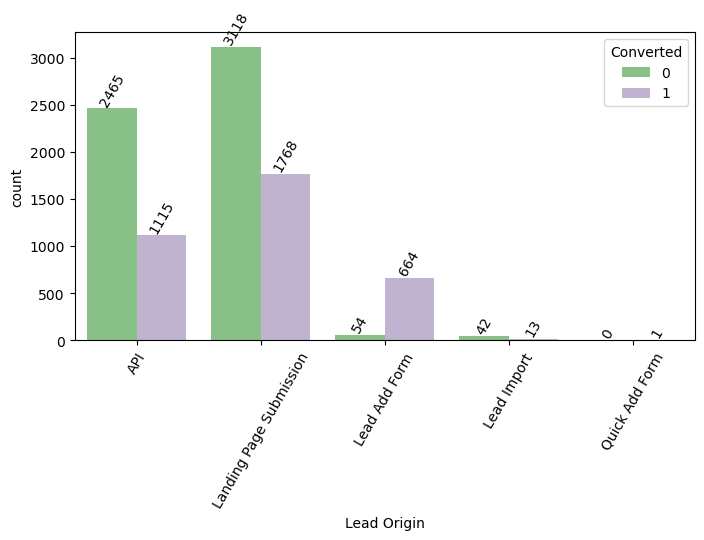

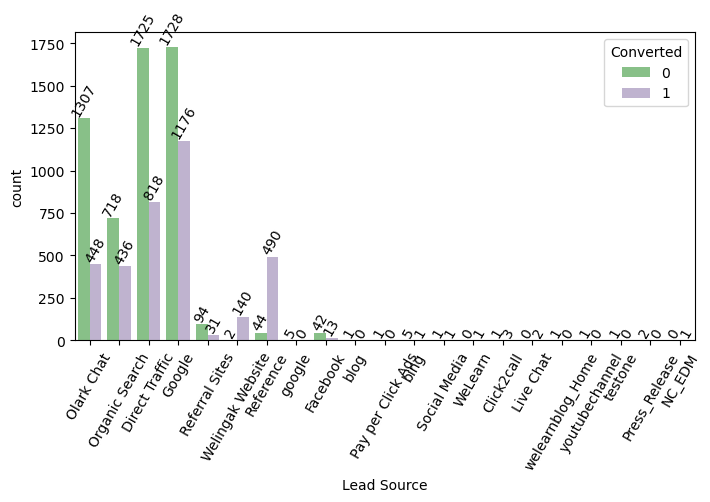

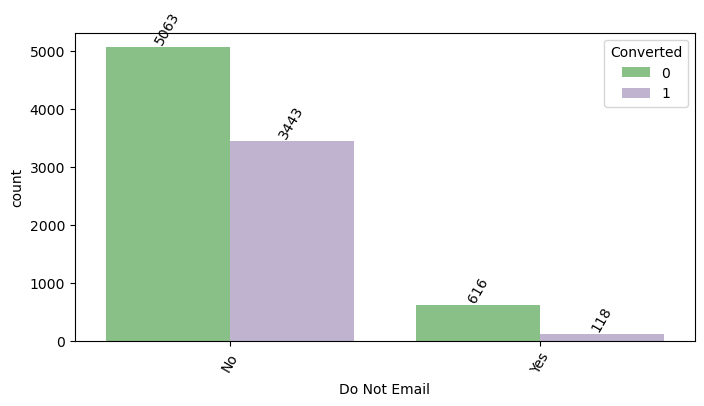

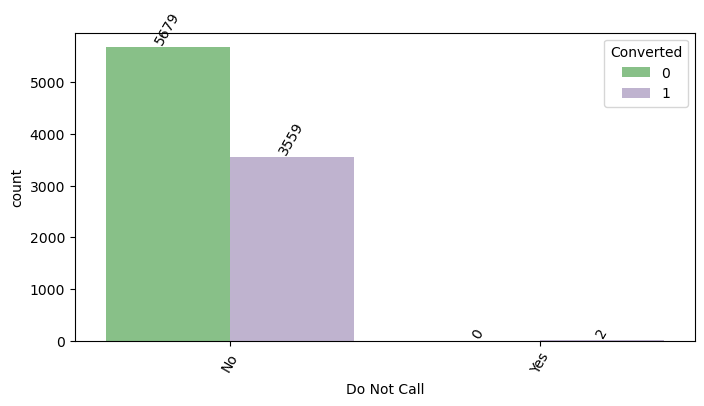

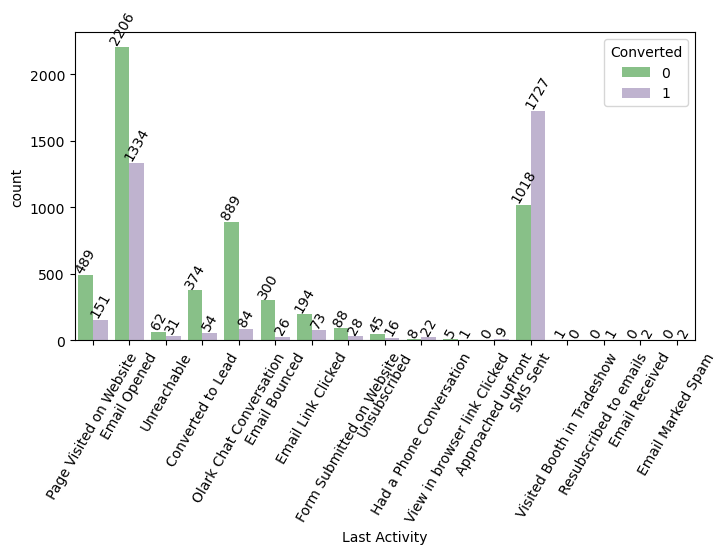

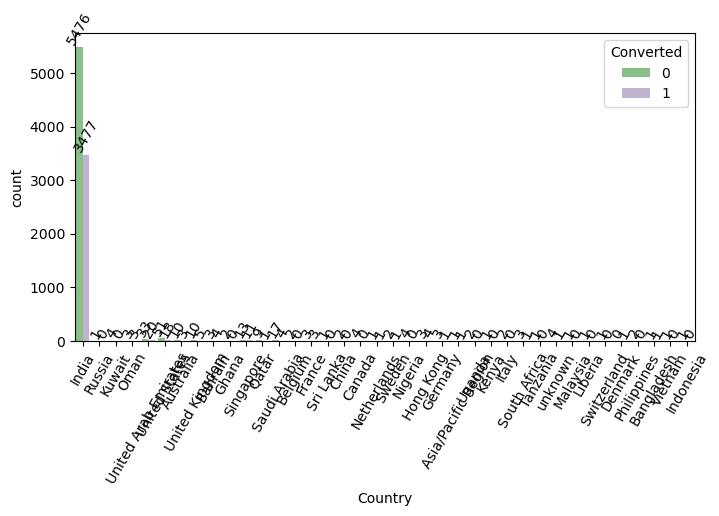

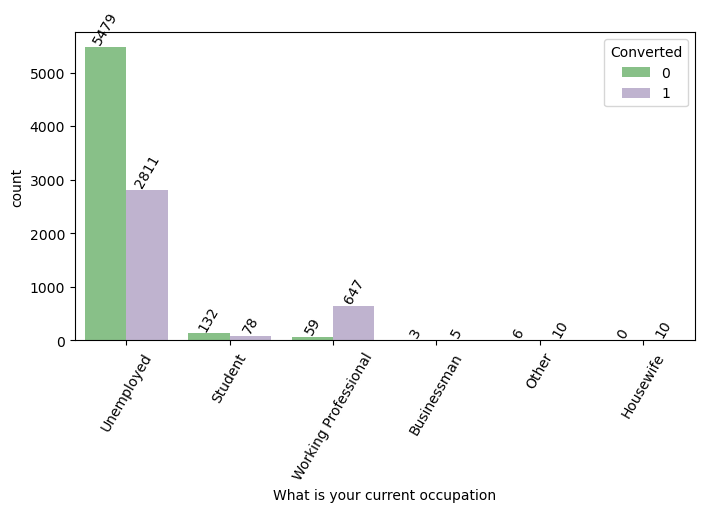

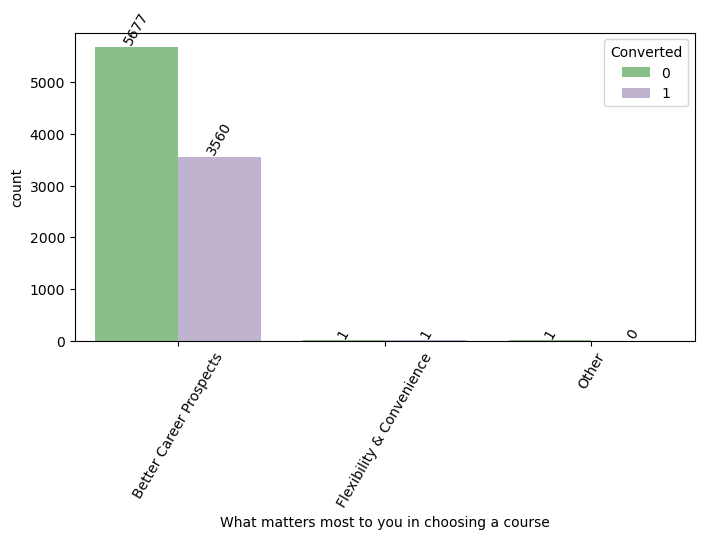

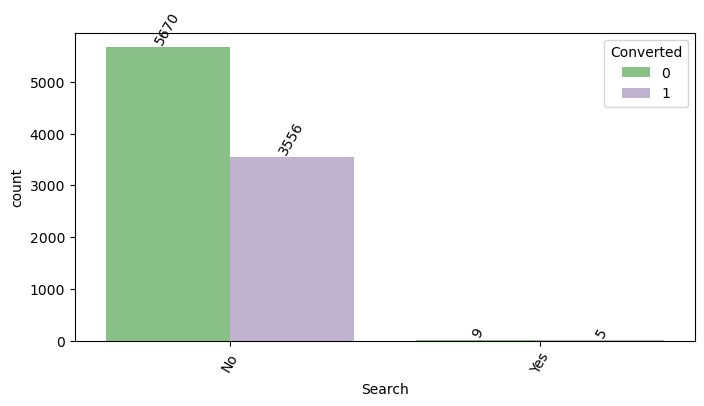

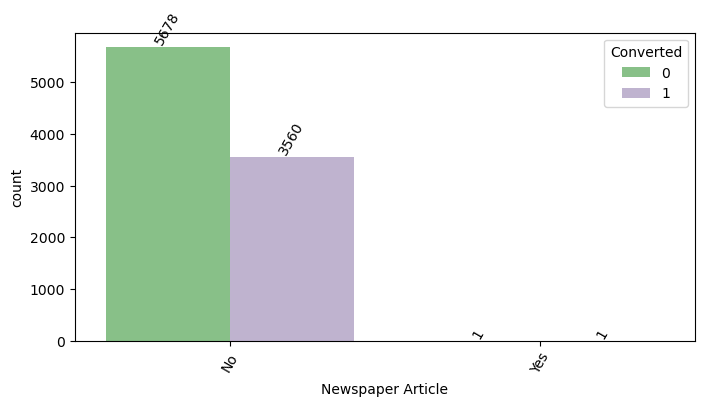

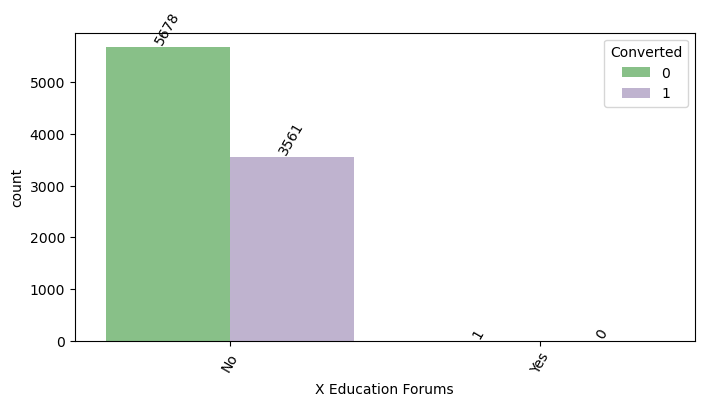

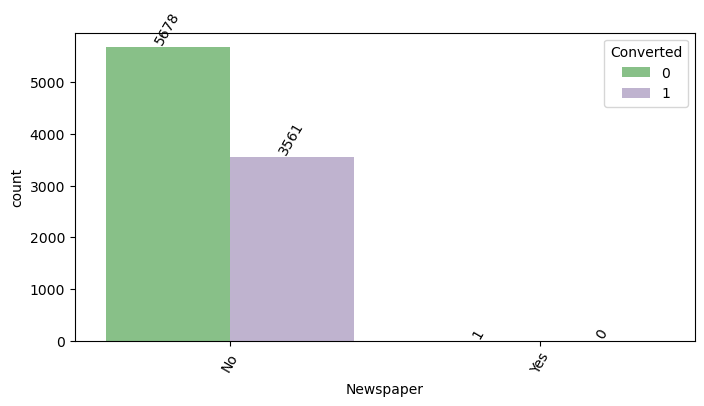

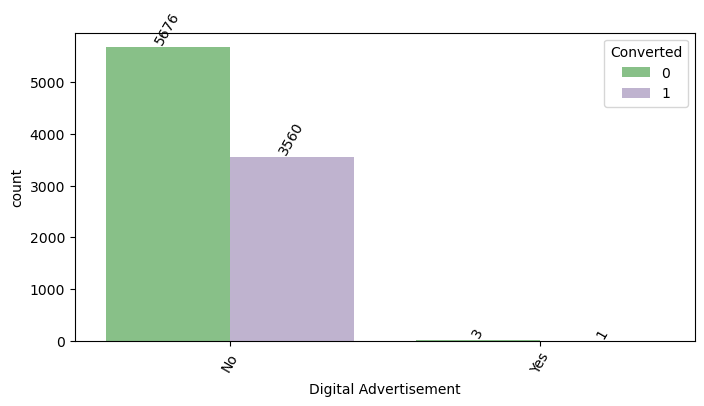

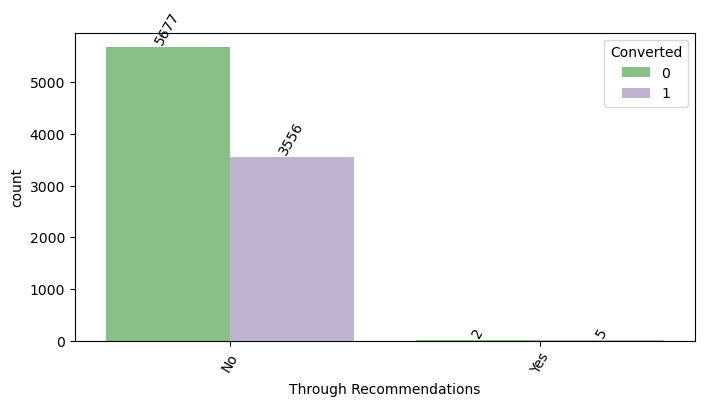

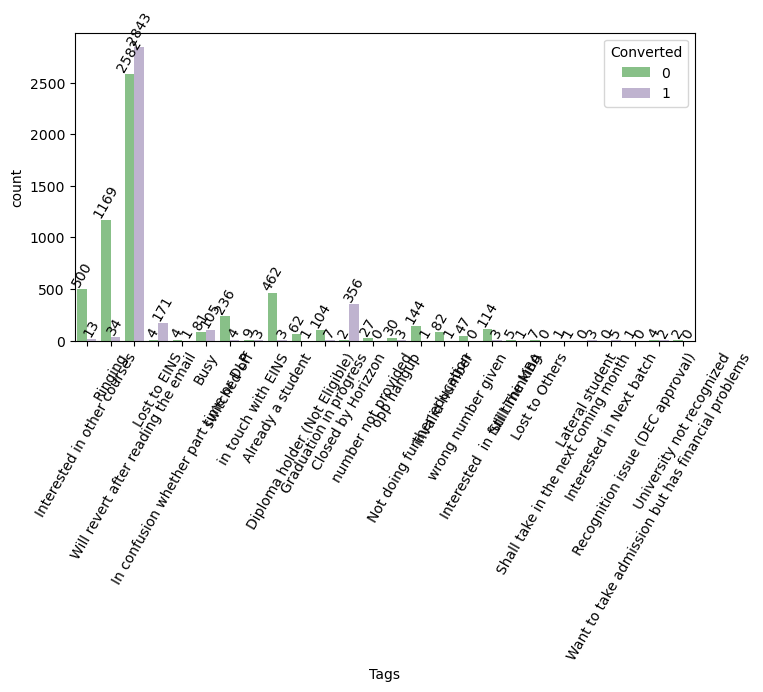

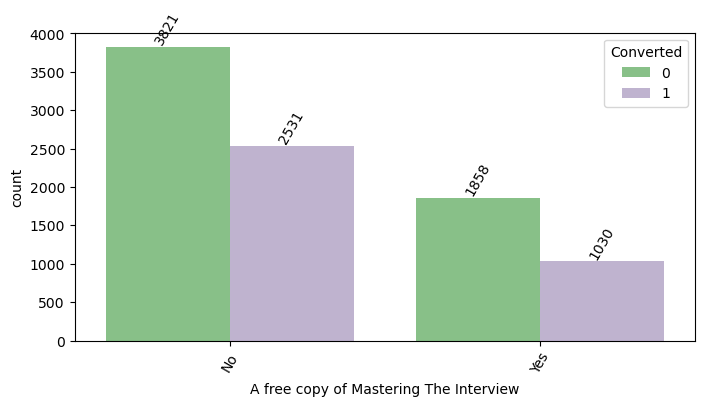

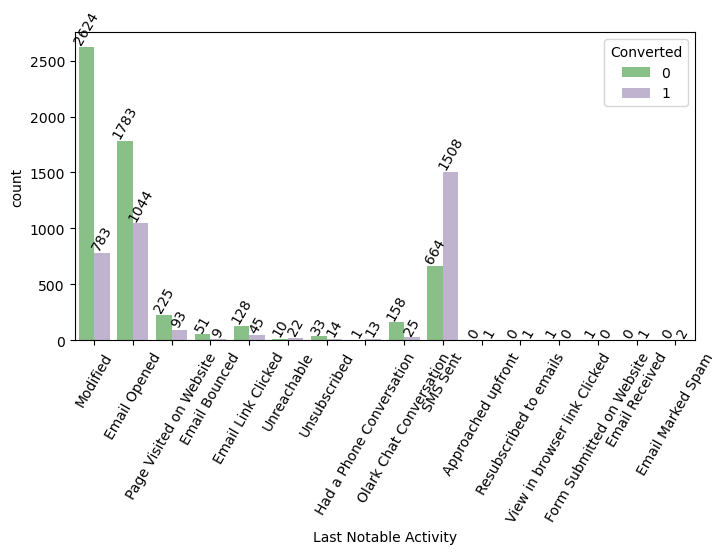

In [207]:
for col in cat_cols:
    plt.figure(figsize=(8,4))
    ax=sns.countplot(data=leads_data,x=col,palette='Accent',hue=leads_data.Converted)
    for x in ax.containers:
        ax.bar_label(x,rotation=60)
    plt.xticks(rotation=60)
    plt.show()

Inference drawn from the categorical features:
    
    Lead Origin:API,Landing Page Submission these origin is converted.
    
    Lead Source:Google,direct traffic these are the highest source of lead followed by Reference,Olark chat,Organic search
    
    Do not email:Larger number of leads do not want to be emailed
    
    Do not Call:Larger number of leads do not want to be called
    
    Last Activity:1.Most of the lead have their Email opened as their last activity.
                  2.Most of the lead also have clicked on browser link sent from sms.
    
    Country:Most values are 'India' no such inference can be drawn
    
    What is your current occupation:1.Working Professionals going for the course have high chances of joining it.
                                    2.Unemployed leads are the most in numbers but has around 30-35% conversion rate.
    
    What matters most to you in choosing a course:Most entries are 'Better Career Prospects'.
                                                  No Inference can be drawn with this parameter
    
    Search:Most entries are 'No'. No Inference can be drawn with this parameter.
    
    Newspaper Article:Most entries are 'No'. No Inference can be drawn with this parameter.
    
    Newspaper:Most entries are 'No'. No Inference can be drawn with this parameter.
    
    X Eduacation Forums:Most entries are 'No'. No Inference can be drawn with this parameter.
    
    Digital Advertisement:Most entries are 'No'. No Inference can be drawn with this parameter.
    
    Through Recomendations:Most entries are 'No'. No Inference can be drawn with this parameter.
    
    Tags:Will revert after reading the email has the heighest of converted.
    
    A free copy of Matering the interview:customer who don't want free copy is more in converted
    
    Last Notable Activity:Email opened and sms send is high in converted
        
        

From the above categorical analysis we find out that Search,Newspaper,Newspaper Article,X eduaction Forums,Digital Advertisment,Through Recomendations do not help in the analysis hence we can drop it

As this is an online platform Country is also irrelevant and also in it India is high

In [208]:
leads_data.drop(['Newspaper Article','Newspaper','Through Recommendations',
                 'Digital Advertisement','Search','Country'] ,axis=1, inplace=True)

In [209]:
#UPDATING CAT COLUMNS
cat_cols=['Lead Origin','Lead Source','Do Not Email','Do Not Call','Last Activity','What is your current occupation',
          'What matters most to you in choosing a course','X Education Forums','Tags','A free copy of Mastering The Interview',
          'Last Notable Activity']

## 3.Data Prepration for model building

In [210]:
#CREATING DUMMY VARIABLES FOR CATEGORICAL COLUMNS
leads_data = pd.get_dummies(data=leads_data,columns=cat_cols,drop_first=True)

In [211]:
cols=leads_data.columns.to_list()
for col in cols:
    if leads_data[col].dtype=="bool":
        leads_data[col]=leads_data[col].astype("uint8")

In [212]:
#INSPECTING THE HEADERS
leads_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [213]:
#Total columns after creating dummy columns
leads_data.columns.to_list()

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Origin_Lead Import',
 'Lead Origin_Quick Add Form',
 'Lead Source_Direct Traffic',
 'Lead Source_Facebook',
 'Lead Source_Google',
 'Lead Source_Live Chat',
 'Lead Source_NC_EDM',
 'Lead Source_Olark Chat',
 'Lead Source_Organic Search',
 'Lead Source_Pay per Click Ads',
 'Lead Source_Press_Release',
 'Lead Source_Reference',
 'Lead Source_Referral Sites',
 'Lead Source_Social Media',
 'Lead Source_WeLearn',
 'Lead Source_Welingak Website',
 'Lead Source_bing',
 'Lead Source_blog',
 'Lead Source_google',
 'Lead Source_testone',
 'Lead Source_welearnblog_Home',
 'Lead Source_youtubechannel',
 'Do Not Email_Yes',
 'Do Not Call_Yes',
 'Last Activity_Converted to Lead',
 'Last Activity_Email Bounced',
 'Last Activity_Email Link Clicked',
 'Last Activity_Email Marked Spam',
 'Last Activity_Email Opened',
 'Last Activity_Email Rec

In [214]:
#Importing important libraries required in predictive model building.
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [215]:
#New Shape of dataset
leads_data.shape

(9240, 95)

In [216]:
leads_data.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_google',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Do Not Email_Yes', 'Do Not Call_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email

### SPLITTING THE DATA

In [217]:
#Seperating Dependent and non dependent columns for splitting the train and test data
y =leads_data['Converted']
x=leads_data.drop('Converted', axis=1)

In [218]:
#Spliting data into Train and Test
#Train Test split with 70:30 ratio
x_train, x_test,y_train,y_test = train_test_split(x,y,train_size=0.7, random_state=100)

In [219]:
#Shape of Train and Test data sets after split
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6468, 94)
(2772, 94)
(6468,)
(2772,)


### SCALING THE DATA

In [220]:
#Let us scale continuous variables and Fit and transform training set only
scaler=StandardScaler()
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,-1.122305,-0.885371,-1.266675,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0.275215,0.005716,-0.516439,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0.624595,-0.691418,0.143543,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0.624595,1.365219,1.553761,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3934,-1.122305,-0.885371,-1.266675,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [221]:
#Looking at x_train stats
x_train.describe()


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6.468000e+03,6.468000e+03,6.468000e+03,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,...,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.0
mean,2.856232e-17,-6.701161e-17,-6.893407e-17,0.528139,0.079468,0.005102,0.000155,0.271490,0.005102,0.320037,...,0.000155,0.001701,0.367811,0.018553,0.035869,0.000155,0.237477,0.003247,0.004793,0.0
std,1.000077e+00,1.000077e+00,1.000077e+00,0.499246,0.270489,0.071252,0.012434,0.444763,0.071252,0.466527,...,0.012434,0.041207,0.482247,0.134950,0.185978,0.012434,0.425570,0.056892,0.069069,0.0
min,-1.122305e+00,-8.853708e-01,-1.266675e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,-7.729250e-01,-8.634138e-01,-7.025878e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,-7.416494e-02,-4.352528e-01,-1.385005e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,6.245952e-01,8.098906e-01,4.255868e-01,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,2.720875e+00,3.271816e+00,2.117849e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


We can clearly see that all the values are scaled between 0 and 1

## 4.MODEL BUILDING

### Building Model with RFE

Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [222]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [223]:
# Import RFE and select 20 variables
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select= 20)             # running RFE with 20 variables as output
rfe = rfe.fit(x_train, y_train)

In [224]:
#below are the fields selected or rejected for RFE and their weights
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 43),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 44),
 ('Lead Origin_Landing Page Submission', False, 52),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 30),
 ('Lead Origin_Quick Add Form', False, 29),
 ('Lead Source_Direct Traffic', False, 37),
 ('Lead Source_Facebook', False, 31),
 ('Lead Source_Google', False, 50),
 ('Lead Source_Live Chat', False, 60),
 ('Lead Source_NC_EDM', False, 35),
 ('Lead Source_Olark Chat', False, 17),
 ('Lead Source_Organic Search', False, 48),
 ('Lead Source_Pay per Click Ads', False, 72),
 ('Lead Source_Press_Release', False, 41),
 ('Lead Source_Reference', False, 24),
 ('Lead Source_Referral Sites', False, 49),
 ('Lead Source_Social Media', False, 18),
 ('Lead Source_WeLearn', False, 40),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 67),
 ('Lead Source_blog', False, 28),
 ('Lead Source_google', False, 16),
 ('Lead Source_testone', False, 74

In [225]:
#VIF Function definition of getting compatibility of the features in RFE model
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = x_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [226]:
#Creating list of columns selected for RFE model building process
#Print Columns selected by RFE. We will manually eliminate for these columns
x_train_rfe=x_train.columns[rfe.support_].tolist()
print(x_train_rfe)

['Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website', 'Do Not Email_Yes', 'What is your current occupation_Unemployed', 'What is your current occupation_Working Professional', 'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)', 'Tags_Interested in Next batch', 'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_in touch with EINS', 'Tags_invalid number', 'Tags_switched off', 'Tags_wrong number given', 'Last Notable Activity_Had a Phone Conversation', 'Last Notable Activity_SMS Sent']


## Creating Models

### Model 1

In [227]:
#Selected columns for Model 1 - all columns selected by RFE
rfe_cols=['Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website', 'Do Not Email_Yes',
          'What is your current occupation_Unemployed', 'What is your current occupation_Working Professional', 'Tags_Busy',
          'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)', 'Tags_Interested in Next batch',
          'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Will revert after reading the email',
          'Tags_in touch with EINS', 'Tags_invalid number', 'Tags_switched off', 'Tags_wrong number given',
          'Last Notable Activity_Had a Phone Conversation', 'Last Notable Activity_SMS Sent']
x_train_sm = sm.add_constant(x_train[rfe_cols])
logm1 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())
get_vif(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1801.0
Date:                Mon, 22 Jul 2024   Deviance:                       3602.0
Time:                        09:40:31   Pearson chi2:                 1.12e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5381
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Model 2
Drop "Tags_Lateral student"due to High P-Score

In [228]:
rfe_cols=['Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website', 'Do Not Email_Yes',
          'What is your current occupation_Unemployed', 'What is your current occupation_Working Professional', 'Tags_Busy',
          'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)', 'Tags_Interested in Next batch',
          'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Will revert after reading the email',
          'Tags_in touch with EINS', 'Tags_invalid number', 'Tags_switched off', 'Tags_wrong number given',
          'Last Notable Activity_Had a Phone Conversation', 'Last Notable Activity_SMS Sent']
x_train_sm = sm.add_constant(x_train[rfe_cols])
logm1 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())
get_vif(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1810.6
Date:                Mon, 22 Jul 2024   Deviance:                       3621.2
Time:                        09:40:33   Pearson chi2:                 1.13e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5367
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Model 3
Drop 'Tags_Interested in Next batch' due to High P-Score

In [229]:
rfe_cols=['Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website', 'Do Not Email_Yes',
          'What is your current occupation_Unemployed', 'What is your current occupation_Working Professional', 'Tags_Busy',
          'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)','Tags_Lost to EINS', 'Tags_Ringing',
          'Tags_Will revert after reading the email','Tags_in touch with EINS', 'Tags_invalid number', 'Tags_switched off',
          'Tags_wrong number given','Last Notable Activity_Had a Phone Conversation', 'Last Notable Activity_SMS Sent']
x_train_sm = sm.add_constant(x_train[rfe_cols])
logm1 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())
get_vif(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1814.7
Date:                Mon, 22 Jul 2024   Deviance:                       3629.4
Time:                        09:40:34   Pearson chi2:                 1.13e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5362
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Model 4
Drop "Tags_Diploma holder (Not Eligible) " due to High P-Score

In [230]:
rfe_cols=['Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website', 'Do Not Email_Yes',
          'What is your current occupation_Unemployed', 'What is your current occupation_Working Professional', 'Tags_Busy',
          'Tags_Closed by Horizzon','Tags_Lost to EINS', 'Tags_Ringing','Tags_Will revert after reading the email',
          'Tags_in touch with EINS', 'Tags_invalid number', 'Tags_switched off', 'Tags_wrong number given',
          'Last Notable Activity_Had a Phone Conversation', 'Last Notable Activity_SMS Sent']
x_train_sm = sm.add_constant(x_train[rfe_cols])
logm1 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())
get_vif(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1816.7
Date:                Mon, 22 Jul 2024   Deviance:                       3633.4
Time:                        09:40:36   Pearson chi2:                 1.14e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5359
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Model 5
Drop " Tags_wrong number given " due to High P-Score

In [231]:
rfe_cols=['Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website', 'Do Not Email_Yes',
          'What is your current occupation_Unemployed', 'What is your current occupation_Working Professional', 'Tags_Busy',
          'Tags_Closed by Horizzon','Tags_Lost to EINS', 'Tags_Ringing','Tags_Will revert after reading the email',
          'Tags_in touch with EINS', 'Tags_invalid number', 'Tags_switched off',
          'Last Notable Activity_Had a Phone Conversation', 'Last Notable Activity_SMS Sent']
x_train_sm = sm.add_constant(x_train[rfe_cols])
logm1 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())
get_vif(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1818.9
Date:                Mon, 22 Jul 2024   Deviance:                       3637.8
Time:                        09:40:37   Pearson chi2:                 1.14e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5356
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Model 6
Drop "  Tags_invalid number    " due to High P-Score

In [232]:
rfe_cols=['Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website', 'Do Not Email_Yes',
          'What is your current occupation_Unemployed', 'What is your current occupation_Working Professional', 'Tags_Busy',
          'Tags_Closed by Horizzon','Tags_Lost to EINS', 'Tags_Ringing','Tags_Will revert after reading the email',
          'Tags_in touch with EINS','Tags_switched off','Last Notable Activity_Had a Phone Conversation',
          'Last Notable Activity_SMS Sent']
x_train_sm = sm.add_constant(x_train[rfe_cols])
logm1 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())
get_vif(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1820.8
Date:                Mon, 22 Jul 2024   Deviance:                       3641.6
Time:                        09:40:38   Pearson chi2:                 1.15e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5353
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Model 7
Drop "What is your current occupation_Unemployed " due to High VIF

In [233]:
rfe_cols=['Total Time Spent on Website', 'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website', 'Do Not Email_Yes',
          'What is your current occupation_Working Professional', 'Tags_Busy','Tags_Closed by Horizzon',
          'Tags_Lost to EINS', 'Tags_Ringing','Tags_Will revert after reading the email',
          'Tags_in touch with EINS','Tags_switched off','Last Notable Activity_Had a Phone Conversation',
          'Last Notable Activity_SMS Sent']
x_train_sm = sm.add_constant(x_train[rfe_cols])
logm1 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())
get_vif(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1829.4
Date:                Mon, 22 Jul 2024   Deviance:                       3658.8
Time:                        09:40:40   Pearson chi2:                 1.14e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5341
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### Model 8
Drop "Lead Source_Welingak Website " due to High P-Score

In [234]:
rfe_cols=['Total Time Spent on Website', 'Lead Origin_Lead Add Form','Do Not Email_Yes',
          'What is your current occupation_Working Professional', 'Tags_Busy','Tags_Closed by Horizzon',
          'Tags_Lost to EINS', 'Tags_Ringing','Tags_Will revert after reading the email',
          'Tags_in touch with EINS','Tags_switched off','Last Notable Activity_Had a Phone Conversation',
          'Last Notable Activity_SMS Sent']
x_train_sm = sm.add_constant(x_train[rfe_cols])
logm1 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())
get_vif(rfe_cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1832.0
Date:                Mon, 22 Jul 2024   Deviance:                       3664.1
Time:                        09:40:41   Pearson chi2:                 1.18e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5337
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

## 5.Model Evaluation
Now, both the p-values and VIFs seems goof for all the variables. So let's go ahead and make predictions using this final set of features.

#### PREDICTING THE MODEL ON TRAIN

In [235]:
# Use 'predict' to predict the probabilities on the train set
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

1871    0.001306
6795    0.314681
3516    0.001599
8105    0.162413
3934    0.153545
4844    0.998561
3297    0.001536
8071    0.999960
987     0.461872
7423    0.980674
dtype: float64

In [236]:
#Predicting dependent variable on train data.
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00130638, 0.3146814 , 0.00159858, 0.16241253, 0.15354532,
       0.99856129, 0.00153592, 0.99996008, 0.46187222, 0.98067402])

#### CREATING A NEW DF HAVING CONVERTEDS STATUS AND PREDICTED STATUS

In [237]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.001306,1871
1,0,0.314681,6795
2,0,0.001599,3516
3,0,0.162413,8105
4,0,0.153545,3934


In [238]:
#Predicting dependent variable on train data by giving a common threshold
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.001306,1871,0
1,0,0.314681,6795,0
2,0,0.001599,3516,0
3,0,0.162413,8105,0
4,0,0.153545,3934,0


#### GENERATING CONFUSION MATRIX

In [239]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3723  279]
 [ 410 2056]]


In [240]:
#Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8934755720470006


In [241]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [242]:
#Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8337388483373885

In [243]:
#Let us calculate specificity
TN / float(TN+FP)

0.9302848575712144

In [244]:
#Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.06971514242878561


In [245]:
#positive predictive value
print (TP / float(TP+FP))

0.8805139186295503


In [246]:
#Negative predictive value
print (TN / float(TN+ FN))

0.9007984514880232


Now let us check the Roc curve

### PLOTTING ROC CURVE

In [247]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [248]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

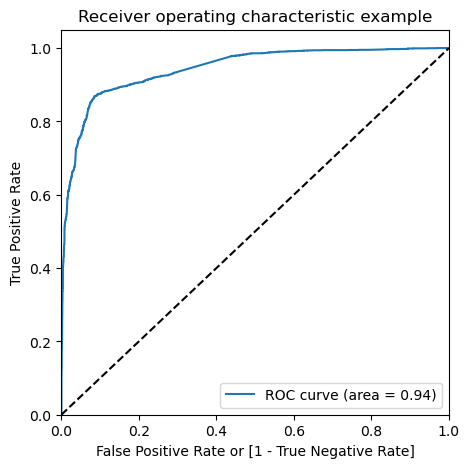

In [249]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.95 indicating a good predictive model.

### Finding Optimal Cutoff Point
Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that:

In [250]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.001306,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.314681,6795,0,1,1,1,1,0,0,0,0,0,0
2,0,0.001599,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.162413,8105,0,1,1,0,0,0,0,0,0,0,0
4,0,0.153545,3934,0,1,1,0,0,0,0,0,0,0,0


In [251]:
#Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)


     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.705937  0.980535  0.536732
0.2   0.2  0.833797  0.907948  0.788106
0.3   0.3  0.887755  0.880373  0.892304
0.4   0.4  0.896568  0.860908  0.918541
0.5   0.5  0.893476  0.833739  0.930285
0.6   0.6  0.884663  0.790754  0.942529
0.7   0.7  0.873377  0.733982  0.959270
0.8   0.8  0.841064  0.615572  0.980010
0.9   0.9  0.811224  0.519059  0.991254


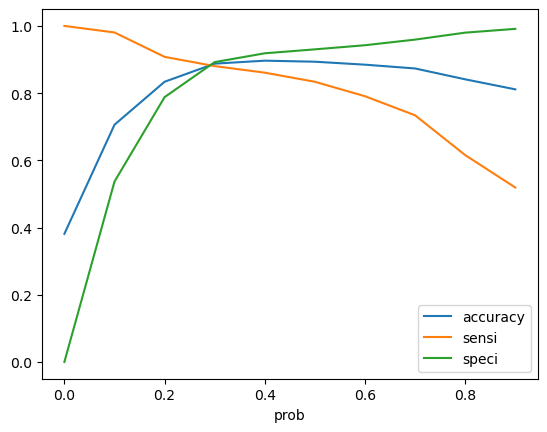

In [252]:
#Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

After calculating the sensitivity and specificity for various probabilities 0.4 is the optimum point to take it as a cutoff probability, since the cutoff range 0.3 - 0.4 is still too low, cutoff between 0.4-0.45 should be the optimum choice.

In [253]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.001306,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.314681,6795,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.001599,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.162413,8105,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.153545,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [254]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.001306,1871,0,0
1,0,0.314681,6795,0,31
2,0,0.001599,3516,0,0
3,0,0.162413,8105,0,16
4,0,0.153545,3934,0,15


In [255]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8965677179962894

In [256]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3676,  326],
       [ 343, 2123]], dtype=int64)

In [257]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [258]:
#Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8609083536090836

In [259]:
#Let us calculate specificity
TN / float(TN+FP)

0.9185407296351824

Observation:

So as we can see above the model seems to be performing well. The ROC curve has a value of 0.94, which is very good. We have the following values for the Train Data:

Accuracy : 89.6%

Sensitivity : 86%

Specificity : 91%

Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [260]:
#Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.0814592703648176


In [261]:
#Negative predictive value
print (TP / float(TP+FP))

0.8668844426296447


In [262]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3676,  326],
       [ 343, 2123]], dtype=int64)

In [263]:
#Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8668844426296447

In [264]:
#Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8609083536090836

In [265]:
from sklearn.metrics import precision_score, recall_score

In [266]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8668844426296447

In [267]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8609083536090836

In [268]:
from sklearn.metrics import precision_recall_curve

In [269]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

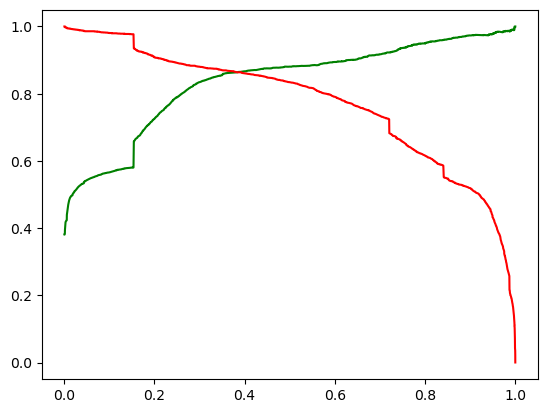

In [270]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Let us change the threshold from 0.4 to 0.42 and check the metrics

In [271]:
#the cutoff is 0.42 from above precision and recall chart, lets check accuracy at cutoff 0.42
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,Lead_Score
0,0,0.001306,1871,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0.314681,6795,0,1,1,1,1,0,0,0,0,0,0,0,31
2,0,0.001599,3516,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0.162413,8105,0,1,1,0,0,0,0,0,0,0,0,0,16
4,0,0.153545,3934,0,1,1,0,0,0,0,0,0,0,0,0,15


#### FINDING THE LEAD SCORE AS MENTIONED IN THE PROBLEM STATEMENT

In [272]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.001306,1871,0,0
1,0,0.314681,6795,0,31
2,0,0.001599,3516,0,0
3,0,0.162413,8105,0,16
4,0,0.153545,3934,0,15


In [273]:
#Let's check the overall accuracy.
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8968769325912183

In [274]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3688,  314],
       [ 353, 2113]], dtype=int64)

In [275]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [276]:
#Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.856853203568532

In [277]:
#Let us calculate specificity
TN / float(TN+FP)

0.9215392303848076

In [278]:
#Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8668844426296447

In [279]:
#Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8609083536090836

In [280]:
#PRECISION_SCORE
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8706221672847136

In [281]:
#recall_score
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.856853203568532

From these we can see that our is performing really good on train set at threshold .42 now let us check it on test set

## 6.Making Predictions on the Test Set

In [282]:
x_test

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4269,8.0,1011,6.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2376,0.0,0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7766,5.0,59,5.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9199,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4359,0.0,0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8649,11.0,290,1.5,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2152,0.0,0,0.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7101,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5331,3.0,1608,3.0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [283]:
#Scaling test set

num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

x_test[num_cols] = scaler.transform(x_test[num_cols])

x_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4269,1.672735,0.964504,2.117849,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2376,-1.122305,-0.885371,-1.266675,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7766,0.624595,-0.777416,1.553761,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9199,-1.122305,-0.885371,-1.266675,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4359,-1.122305,-0.885371,-1.266675,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [284]:
x_test = x_test[rfe_cols]
x_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Do Not Email_Yes,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_switched off,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent
4269,0.964504,0,0,0,0,0,0,0,1,0,0,0,1
2376,-0.885371,1,0,0,0,0,0,0,1,0,0,0,1
7766,-0.777416,0,0,1,0,0,0,0,1,0,0,0,0
9199,-0.885371,0,0,0,0,0,0,0,0,0,0,0,0
4359,-0.885371,1,0,0,0,0,0,0,1,0,0,0,0


In [285]:
x_test_sm = sm.add_constant(x_test[rfe_cols])

### PREDICTIONS ON TEST SET

In [286]:
y_test_pred = res.predict(x_test_sm)

In [287]:
y_test_pred[:10]

4269    0.946551
2376    0.986803
7766    0.757232
9199    0.005547
4359    0.840424
9186    0.892177
1631    0.555962
8963    0.232193
8007    0.259027
5324    0.777505
dtype: float64

In [288]:
#Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [289]:
#Let's see the head
y_pred_1.head()

,0
4269,0.946551
2376,0.986803
7766,0.757232
9199,0.005547
4359,0.840424


In [290]:
#Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [291]:
#Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [292]:
#Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [293]:
#Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [294]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.946551
1,1,2376,0.986803
2,1,7766,0.757232
3,0,9199,0.005547
4,1,4359,0.840424


In [295]:
#Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [296]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,4269,0.946551
1,1,2376,0.986803
2,1,7766,0.757232
3,0,9199,0.005547
4,1,4359,0.840424


In [297]:
#Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [298]:
#Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,4269,1,0.946551,95
1,2376,1,0.986803,99
2,7766,1,0.757232,76
3,9199,0,0.005547,1
4,4359,1,0.840424,84


In [299]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.42 else 0)

In [300]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,4269,1,0.946551,95,1
1,2376,1,0.986803,99,1
2,7766,1,0.757232,76,1
3,9199,0,0.005547,1,0
4,4359,1,0.840424,84,1


In [301]:
100*sum(y_pred_final['Converted'])/len(leads_data['Converted'])

11.85064935064935

In [302]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8964646464646465

In [303]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1533,  144],
       [ 143,  952]], dtype=int64)

In [304]:
#Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.856853203568532

In [305]:
#Let us calculate specificity
TN / float(TN+FP)

0.9215392303848076

In [306]:
#precision_score
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8686131386861314

In [307]:
#recall_score
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.869406392694064

In [308]:
#Precision
TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8668844426296447

In [309]:
#Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8609083536090836

### FINAL RESULT

#### 1.Comparing the values obtained for Train & Test:

Train Data:
  
  Accuracy : 89.6%
  
  Sensitivity : 85%
  
  Specificity : 92%
  
  precision:86%
  
  recall:86%
  
  precision_score:87%
  
  recall_score:85%
  


Test Data: Accuracy : 89.6%
  
  Sensitivity : 85%
  
  Specificity :92%
  
  precision:78%
  
  recall:86%
  
  recall_score:86.9
  
  precision_score:86.6

The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model

Probabilty Threshold/cutoff is 0.42 that is giving best result

Last Notable Activity_SMS Sent<br/> 
Tags_Will revert after reading the email<br/>
Lead Origin_Lead Add Form<br/>  
Tags_Closed by Horizzon<br/>  
What is your current occupation_Working Professional<br/>
Tags_Ringing<br/>  
Total Time Spent on Website<br/>  
Do Not Email_No<br/>  
Tags_switched off <br/> 
Tags_Busy<br/>  
Tags_Lost to EINS  <br/>
Tags_in touch with EINS <br/> 
Last Notable Activity_Had a Phone Conversation<br/>

Keeping all these in mind X_Eduacation can flourish as they have very high chance to get almost all potential buyers to change their mind and buy the course


#### 2. Finding out the leads which should be contacted:

The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85.
They can be termed as 'Hot Leads'.

In [310]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=80]
hot_leads

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,4269,1,0.946551,95,1
1,2376,1,0.986803,99,1
4,4359,1,0.840424,84,1
5,9186,1,0.892177,89,1
12,2935,1,0.967708,97,1
...,...,...,...,...,...
2745,7273,1,0.839320,84,1
2756,3820,1,0.995405,100,1
2766,3118,0,0.935120,94,1
2768,2152,1,0.986803,99,1


So there are 702 leads which can be contacted and have a high chance of getting converted. The Prospect ID of the customers to be contacted are :

In [311]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([4269, 2376, 4359, 9186, 2935, 2907,  493, 4877, 1557, 4952, 1807,
       8899, 8522, 8429, 2061, 1200, 7909, 5638, 3854, 7631, 7250, 6037,
       8714, 5895, 3289, 2716, 6666, 3417, 5448, 1287, 8103, 3444, 2392,
       6017, 5363, 6223, 7476, 4316, 8499, 6418, 4830, 7306, 3192, 2913,
       1365, 6687, 5793, 6318, 6066, 8099,  854, 3936, 2556, 4211, 4868,
       8120, 2844, 4896, 8083, 7396,   88,  643, 7620, 7683, 8262, 8024,
       6860, 4058, 8547, 5042, 2243, 6557,  942, 5896,  269, 5092, 5666,
       2115, 8113,  534, 5911, 4645, 2481, 7159,  914, 7978, 1965, 3845,
       2946, 4869, 7627, 7876,  954, 8971, 6560, 4902, 8276, 5818, 2804,
       1826,  848,  446, 3173, 2629, 3725, 2199, 4786, 8348, 7812, 1026,
       2918,   76, 7859, 5825, 8055,  735, 2266, 4403, 2926, 4194, 2524,
       8966, 1867, 7503, 1467, 3777, 5697, 7832, 4221, 6725,  838, 6156,
       2055, 2549, 2653, 6582, 3478, 5687, 4445, 3665, 2249,  982, 6898,
       3751, 4484, 5832, 9064, 3190,   77, 5010, 15

These are the id's of the one who can be definitly be converted and make more profits for X eduaction